In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('covid-19-death-rate-vs-population-density.csv', quotechar='"', skipinitialspace=True)

In [25]:
data[data['Entity'] == 'United States']

Entity Code          Date  \
38669  United States  USA  Dec 31, 2019   
38670  United States  USA   Jan 1, 2020   
38671  United States  USA   Jan 2, 2020   
38672  United States  USA   Jan 3, 2020   
38673  United States  USA   Jan 4, 2020   
...              ...  ...           ...   
38816  United States  USA  May 26, 2020   
38817  United States  USA  May 27, 2020   
38818  United States  USA  May 28, 2020   
38819  United States  USA  May 29, 2020   
38820  United States  USA  May 30, 2020   

       Confirmed COVID-19 deaths per million people (deaths per million)  \
38669                                              0.000                   
38670                                              0.000                   
38671                                              0.000                   
38672                                              0.000                   
38673                                              0.000                   
...                                                  ...                   
38816                                            296.735                   
38817                                            298.837                   
38818                                            303.448                   
38819                                            306.998                   
38820                                            310.680                   

         Year  Population density (people per sq. km of land area) (Rate)  
38669  2017.0                                          35.607765           
38670  2017.0                                          35.607765           
38671  2017.0                                          35.607765           
38672  2017.0                                          35.607765           
38673  2017.0                                          35.607765           
...       ...                                                ...           
38816  2017.0                                          35.607765           
38817  2017.0                                          35.607765           
38818  2017.0                                          35.607765           
38819  2017.0                                          35.607765           
38820  2017.0                                          35.607765           

[152 rows x 6 columns]

In [26]:
chart_countries = ["Belgium", "Spain", "Italy", "France", "United Kingdom", "Netherlands", "United States", "Iran", "Germany", "China"]

In [27]:
GER = data['Entity'] == 'Germany'

In [28]:
FRA = data['Entity'] == 'France'

In [29]:
ESP = data['Entity'] == 'Spain'

In [30]:
USA = data['Entity'] == 'United States'

In [31]:
deaths_S = 'Confirmed COVID-19 deaths per million people (deaths per million)'
density_S = 'Population density (people per sq. km of land area) (Rate)'

In [32]:
data[USA].iloc[-1][deaths_S]

310.68

In [33]:
data[FRA].iloc[-1][deaths_S]

439.903

In [34]:
data[ESP].iloc[-1][deaths_S]

nan

In [35]:
data[USA].iloc[-1][deaths_S] / (data[USA].iloc[-1][density_S] / data[GER].iloc[-1][density_S])

2067.9825436318915

In [36]:
corrected_deaths = pd.DataFrame(columns=['Entity','Deaths per million people','Deaths Corrected'])
for country in chart_countries:
#for country in np.unique(data['Entity']):
    LOC = data['Entity'] == country
    if pd.isna(data[LOC].iloc[-1][deaths_S]):
        old_deaths = data[LOC].iloc[-2][deaths_S]
        deaths = data[LOC].iloc[-2][deaths_S] / (data[LOC].iloc[-1][density_S] / data[GER].iloc[-1][density_S])
    else:
        old_deaths = data[LOC].iloc[-1][deaths_S]
        deaths = data[LOC].iloc[-1][deaths_S] / (data[LOC].iloc[-1][density_S] / data[GER].iloc[-1][density_S])
    #print(country, deaths)
    corrected_deaths = corrected_deaths.append({'Entity': country,'Deaths per million people': old_deaths, 'Deaths Corrected': deaths}, ignore_index=True)

In [37]:
corrected_deaths.sort_values(by=['Deaths per million people'],ascending=False).iloc[:25]

Entity  Deaths per million people  Deaths Corrected
0         Belgium                    814.781        514.204174
1           Spain                    580.069       1476.675803
4  United Kingdom                    562.134        488.222049
2           Italy                    549.586        632.766863
3          France                    439.903        850.592093
5     Netherlands                    346.136        161.323022
6   United States                    310.680       2067.982544
8         Germany                    101.320        101.320000
7            Iran                     91.401        434.739766
9           China                      3.222          5.171299

In [38]:
corrected_deaths.sort_values(by=['Deaths Corrected'],ascending=False).iloc[:25]

Entity  Deaths per million people  Deaths Corrected
6   United States                    310.680       2067.982544
1           Spain                    580.069       1476.675803
3          France                    439.903        850.592093
2           Italy                    549.586        632.766863
0         Belgium                    814.781        514.204174
4  United Kingdom                    562.134        488.222049
7            Iran                     91.401        434.739766
5     Netherlands                    346.136        161.323022
8         Germany                    101.320        101.320000
9           China                      3.222          5.171299

In [39]:
corrected_deaths_ascending = corrected_deaths.sort_values(by=['Deaths Corrected'],ascending=True)

In [40]:
corrected_deaths_descending = corrected_deaths.sort_values(by=['Deaths per million people'],ascending=True)

In [41]:
corrected_deaths_ascending

Entity  Deaths per million people  Deaths Corrected
9           China                      3.222          5.171299
8         Germany                    101.320        101.320000
5     Netherlands                    346.136        161.323022
7            Iran                     91.401        434.739766
4  United Kingdom                    562.134        488.222049
0         Belgium                    814.781        514.204174
2           Italy                    549.586        632.766863
3          France                    439.903        850.592093
1           Spain                    580.069       1476.675803
6   United States                    310.680       2067.982544

In [42]:
corrected_deaths_descending.as_matrix()[:,0]

/Users/blakeforland/.local/share/virtualenvs/py3env-xeiQRiwA/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array(['China', 'Iran', 'Germany', 'United States', 'Netherlands',
       'France', 'Italy', 'United Kingdom', 'Spain', 'Belgium'],
      dtype=object)

/Users/blakeforland/.local/share/virtualenvs/py3env-xeiQRiwA/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/Users/blakeforland/.local/share/virtualenvs/py3env-xeiQRiwA/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/blakeforland/.local/share/virtualenvs/py3env-xeiQRiwA/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


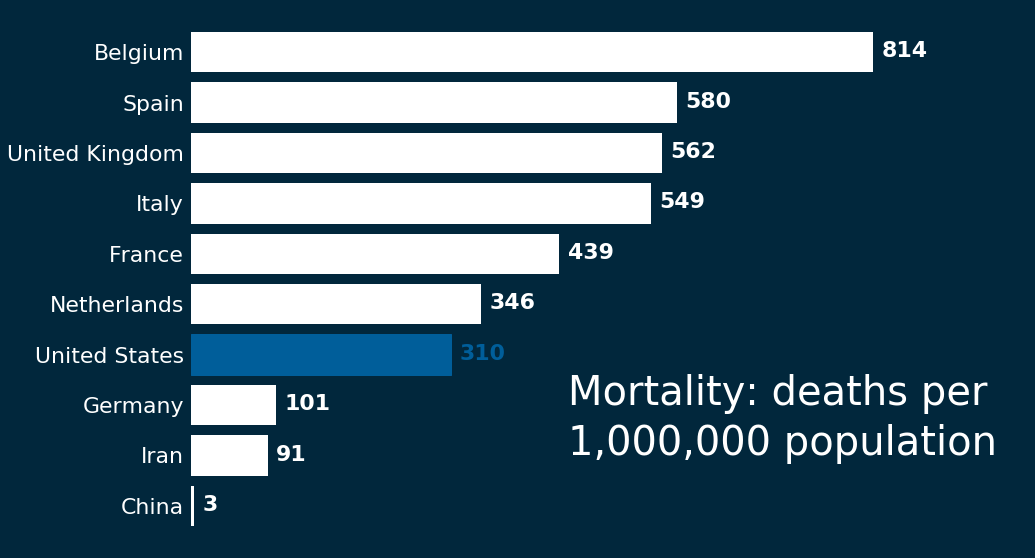

In [43]:
fig,ax = plt.subplots(figsize=(15,10))
fig.patch.set_facecolor((1/256, 39/256, 60/256))
plt.box(on=None)
barlist=plt.barh(corrected_deaths_descending["Entity"],corrected_deaths_descending["Deaths per million people"],color="White")
for i, v in enumerate(corrected_deaths_descending.as_matrix()[:,0]):
    if v == "United States":
        ax.text(corrected_deaths_descending.as_matrix()[i,1]+10, i-.1, str(int(corrected_deaths_descending.as_matrix()[i,1])), color=(0, 94/256, 155/256), fontweight='bold',fontsize=22)
    else:
        ax.text(corrected_deaths_descending.as_matrix()[i,1]+10, i-.1, str(int(corrected_deaths_descending.as_matrix()[i,1])), color='White', fontweight='bold',fontsize=22)
barlist[3].set_color((0, 94/256, 155/256))
frame1 = plt.gca()
plt.xlim(0,1000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    bottom=False,
    left=False,
    labelcolor='White',
    labelsize=22)
plt.text(450,2,"Mortality: deaths per",color='white',fontsize=40)
plt.text(450,1,"1,000,000 population",color='white',fontsize=40)
ax.set_facecolor((1/256, 39/256, 60/256))

/Users/blakeforland/.local/share/virtualenvs/py3env-xeiQRiwA/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/blakeforland/.local/share/virtualenvs/py3env-xeiQRiwA/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/blakeforland/.local/share/virtualenvs/py3env-xeiQRiwA/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


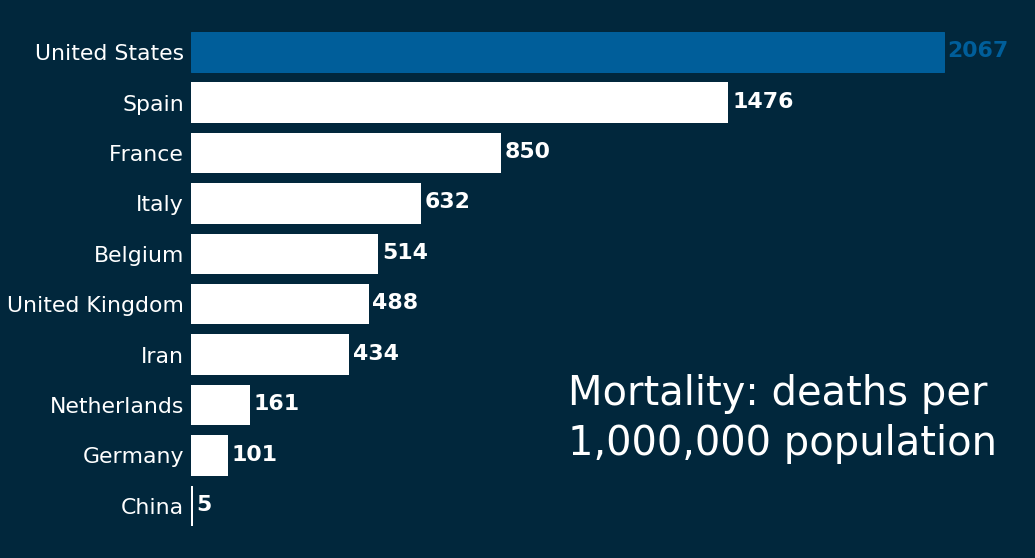

In [44]:
fig,ax = plt.subplots(figsize=(15,10))
fig.patch.set_facecolor((1/256, 39/256, 60/256))
barlist=plt.barh(corrected_deaths_ascending["Entity"], corrected_deaths_ascending["Deaths Corrected"],color='White')
for i, v in enumerate(corrected_deaths_ascending.as_matrix()[:,0]):
    if v == "United States":
        ax.text(corrected_deaths_ascending.as_matrix()[i,2]+10, i-.1, str(int(corrected_deaths_ascending.as_matrix()[i,2])), color=(0, 94/256, 155/256), fontweight='bold',fontsize=22)
    else:
        ax.text(corrected_deaths_ascending.as_matrix()[i,2]+10, i-.1, str(int(corrected_deaths_ascending.as_matrix()[i,2])), color='White', fontweight='bold',fontsize=22)
barlist[9].set_color((0, 94/256, 155/256))
frame1 = plt.gca()
plt.xlim(0,2300)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    bottom=False,
    left=False,
    labelcolor='White',
    labelsize=22)
plt.text(1035,2,"Mortality: deaths per",color='white',fontsize=40)
plt.text(1035,1,"1,000,000 population",color='white',fontsize=40)
plt.box(on=None)
ax.set_facecolor((1/256, 39/256, 60/256))